In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import ipywidgets as widgets
from IPython.display import display

def display_table_with_pie_charts(df):
    # Create a list to store the generated pie charts
    pie_charts = []

    # Generate pie charts for each row in the dataframe
    for _, row in df.iterrows():
        # Create a pie chart based on the data in the row (you can customize this based on your data)
        labels = df.columns[1:]  # Assuming the first column is an index or identifier column
        sizes = row[1:]

        # Create a figure and plot the pie chart
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

        # Append the generated pie chart to the list
        pie_charts.append(fig)

    # Create a function to handle the selection of a row and display the corresponding pie chart
    def show_pie_chart(change):
        # Clear the current output
        output.clear_output()

        # Get the selected pie chart based on the row index
        row_index = change['new']
        pie_chart = pie_charts[row_index]

        # Display the pie chart
        with output:
            display(pie_chart)

    # Create a dropdown widget to select a row
    dropdown = widgets.Dropdown(options=df.index.tolist(), description='Select a row:')

    # Create an output widget to display the selected pie chart
    output = widgets.Output()

    # Attach the event handler to the dropdown widget
    dropdown.observe(show_pie_chart, names='value')

    # Display the table using the tabulate package
    print(tabulate(df, headers='keys', tablefmt='psql'))

    # Display the initial pie chart
    show_pie_chart({'new': dropdown.value})

    # Display the dropdown widget and output widget
    display(dropdown, output)

# Example usage
data = {
    'Index': [1, 2, 3],
    'Value1': [20, 30, 50],
    'Value2': [40, 10, 20],
    'Value3': [10, 25, 15],
    'Value4': [30, 35, 15],
}

df = pd.DataFrame(data)
display_table_with_pie_charts(df)


+----+---------+----------+----------+----------+----------+
|    |   Index |   Value1 |   Value2 |   Value3 |   Value4 |
|----+---------+----------+----------+----------+----------|
|  0 |       1 |       20 |       40 |       10 |       30 |
|  1 |       2 |       30 |       10 |       25 |       35 |
|  2 |       3 |       50 |       20 |       15 |       15 |
+----+---------+----------+----------+----------+----------+


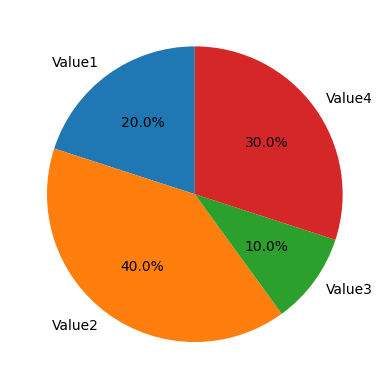

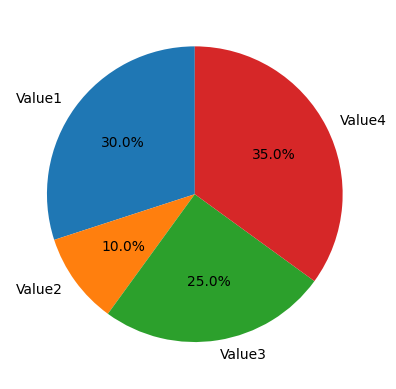

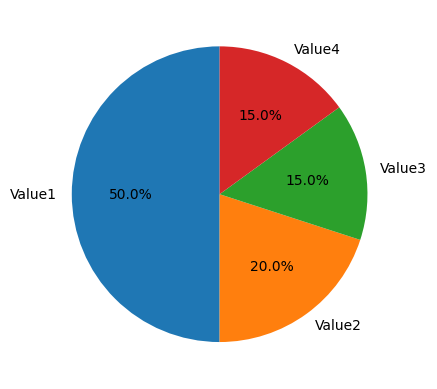

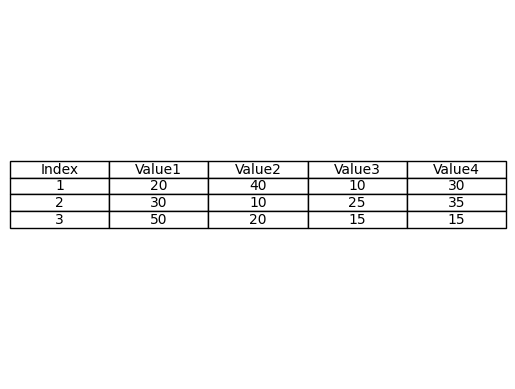

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from IPython.display import display, HTML


def display_table_with_pie_charts(df):
    # Generate pie charts for each row in the dataframe
    pie_charts = []
    for _, row in df.iterrows():
        labels = df.columns[1:]
        sizes = row[1:]
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        pie_charts.append(fig)

    # Create a function to handle the hover event and display the corresponding pie chart
    def show_pie_chart(event):
        # Clear the current output
        output.clear_output()

        # Get the row index based on the hover event
        row_index = int(event.xdata)

        # Get the corresponding pie chart
        pie_chart = pie_charts[row_index]

        # Display the pie chart
        with output:
            display(pie_chart)

    # Create an output widget to display the selected pie chart
    output = widgets.Output()

    # Create an HTML table using the tabulate package
    table_html = tabulate(df, headers='keys', tablefmt='html')

    # Create a figure to display the table using an HTML widget
    table_widget = widgets.HTML(value=table_html)

    # Create a container widget to hold the table widget and the output widget
    container = widgets.VBox([table_widget, output])

    # Create a figure for the table using Matplotlib
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    plt.show(fig)

    # Attach the event handler to the figure for hover events
    fig.canvas.mpl_connect('motion_notify_event', show_pie_chart)

    # Display the container widget
    display(container)


# Example usage
data = {
    'Index': [1, 2, 3],
    'Value1': [20, 30, 50],
    'Value2': [40, 10, 20],
    'Value3': [10, 25, 15],
    'Value4': [30, 35, 15],
}

df = pd.DataFrame(data)
display_table_with_pie_charts(df)




In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
from tabulate import tabulate
from IPython.display import display, HTML
from ipywidgets import interact


def display_table_with_pie_charts(df):
    # Generate pie charts for each row in the dataframe
    pie_charts = []
    for _, row in df.iterrows():
        labels = df.columns[1:]
        sizes = row[1:]
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        pie_charts.append(fig)

    # Create a function to handle the hover event and display the corresponding pie chart
    def show_pie_chart(sel):
        # Clear the current output
        output.clear_output()

        # Get the row index based on the selected row
        row_index = sel.target.index

        # Print the row index
        print("Hovering over row index:", row_index)

        # Get the corresponding pie chart
        pie_chart = pie_charts[row_index]

        # Display the pie chart
        with output:
            display(pie_chart)

    # Create an output widget to display the selected pie chart
    output = widgets.Output()

    # Create an HTML table using the tabulate package
    table_html = tabulate(df, headers='keys', tablefmt='html')

    # Create a figure to display the table using an HTML widget
    table_widget = widgets.HTML(value=table_html)

    # Create a container widget to hold the table widget and the output widget
    container = widgets.VBox([table_widget, output])

    # Create a figure for the table using Matplotlib
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Attach the hover event to the table using mplcursors
    mplcursors.cursor(hover=True).connect("add", show_pie_chart)

    # Display the container widget
    display(container)


# Example usage
data = {
    'Index': [1, 2, 3],
    'Value1': [20, 30, 50],
    'Value2': [40, 10, 20],
    'Value3': [10, 25, 15],
    'Value4': [30, 35, 15],
}

df = pd.DataFrame(data)

# Use interact to continuously run the function and detect cursor movement
interact(display_table_with_pie_charts, df=widgets.fixed(df))



interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.display_table_with_pie_charts(df)>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
from tabulate import tabulate
from IPython.display import display, HTML
import time

# Set the Matplotlib backend to Qt5Agg
plt.switch_backend('Qt5Agg')

def generate_pie_charts(df):
    # Create a list to store the generated pie charts
    pie_charts = []

    # Generate pie charts for each row in the dataframe
    for _, row in df.iterrows():
        # Create a pie chart based on the data in the row (you can customize this based on your data)
        labels = df.columns[1:]  # Assuming the first column is an index or identifier column
        sizes = row[1:]

        # Create a figure and plot the pie chart
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

        # Append the generated pie chart to the list
        pie_charts.append(fig)

    return pie_charts


def display_table(df):
    # Display the table using the tabulate package
    print(tabulate(df, headers='keys', tablefmt='psql'))


def detect_hovered_row(df, pie_charts):
    # Create a figure for the table using Matplotlib
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Create a cursor object to detect hover events
    cursor = mplcursors.cursor(hover=True)

    # Infinite loop to continuously detect the hovered row
    while True:
        # Get the current cursor position
        x, y = plt.ginput(1)[0]

        # Get the index of the row that the cursor is hovering over
        row_index = int(y)

        # Get the corresponding pie chart figure
        pie_chart = pie_charts[row_index]

        # Convert the pie chart figure to a numpy array
        pie_array = np.frombuffer(pie_chart.canvas.tostring_rgb(), dtype=np.uint8)
        pie_array = pie_array.reshape(pie_chart.canvas.get_width_height()[::-1] + (3,))

        # Display the corresponding pie chart
        plt.figure()
        plt.title(f"Hovered Row: {row_index}")
        plt.imshow(pie_array)

        # Pause for 1 second
        time.sleep(1)


# Example usage
data = {
    'Index': [1, 2, 3],
    'Value1': [20, 30, 50],
    'Value2': [40, 10, 20],
    'Value3': [10, 25, 15],
    'Value4': [30, 35, 15],
}

df = pd.DataFrame(data)

# Generate pie charts
pie_charts = generate_pie_charts(df)

# Display the table
display_table(df)

# Start the hover detection loop
detect_hovered_row(df, pie_charts)



+----+---------+----------+----------+----------+----------+
|    |   Index |   Value1 |   Value2 |   Value3 |   Value4 |
|----+---------+----------+----------+----------+----------|
|  0 |       1 |       20 |       40 |       10 |       30 |
|  1 |       2 |       30 |       10 |       25 |       35 |
|  2 |       3 |       50 |       20 |       15 |       15 |
+----+---------+----------+----------+----------+----------+


IndexError: list index out of range